In [63]:
import sklearn
import pandas as pd
import numpy as np
import csv, re
import string
import codecs
import nltk
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import jsonlines

In [64]:
# Load data into a pandas dataframe
path_file= r"data/wcpr_mypersonality.csv"

data = pd.read_csv('/data/wcpr_mypersonality.csv',encoding='mac-roman')

In [65]:
data.columns

Index(['#AUTHID', 'STATUS', 'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN', 'cEXT',
       'cNEU', 'cAGR', 'cCON', 'cOPN', 'DATE', 'NETWORKSIZE', 'BETWEENNESS',
       'NBETWEENNESS', 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY'],
      dtype='object')

In [66]:
# Extract features using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#sublinear_tf=True

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['STATUS'])
y = data['cNEU']

In [67]:
# Create a Naive Bayes classifier trained on the featurized training data

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

# Train a Multinomial Naive Bayes classifier, MultinomialNB()
# LinearSVC(max_iter=100000)
# RandomForestClassifier(n_estimators=100)

clf = LinearSVC(max_iter=100000)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
# Classify the test data and see how well you perform

print("Classifying test data...")
predicted_labels = clf.predict(X_test)
print('Accuracy  = {}'.format(metrics.accuracy_score(predicted_labels,  y_test)))

Classifying test data...
Accuracy  = 0.6043346774193549


Generating plots...


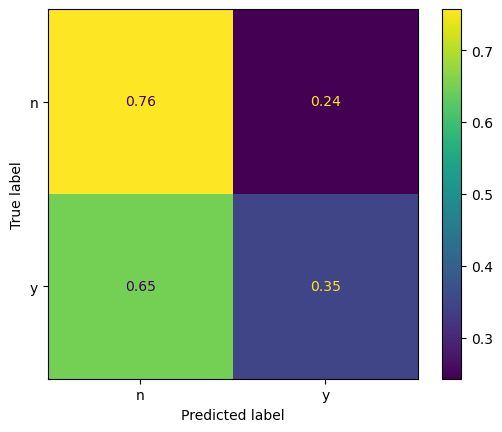

In [69]:
 # Graph the confusion matrix to show accuracies

print("Generating plots...")
metrics.plot_confusion_matrix(clf, X_test, y_test, normalize='true')
plt.show()

In [71]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(predicted_labels, y_test)
report = classification_report(predicted_labels, y_test)

print(f"Accuracy: {accuracy:.2f}")
print(f"Classification report:\n{report}")

Accuracy: 0.60
Classification report:
              precision    recall  f1-score   support

           n       0.76      0.66      0.71      1423
           y       0.35      0.46      0.40       561

    accuracy                           0.60      1984
   macro avg       0.55      0.56      0.55      1984
weighted avg       0.64      0.60      0.62      1984



In [92]:
import sklearn.metrics as metrics

regressor = ['Naive Bayes', 'SVM', 'RandomForest']
models = [MultinomialNB(), LinearSVC(max_iter=100000), RandomForestClassifier(n_estimators=100)]
m_accuracy = []
m_precision = []
m_recall = []
for m in models:
    m.fit(X_train, y_train)
    prediction_m = m.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, prediction_m)
    m_accuracy.append(accuracy)
    for label in ['n', 'y']:
        precision = metrics.precision_score(y_test, prediction_m, pos_label=label)
        recall = metrics.recall_score(y_test, prediction_m,pos_label=label)
        m_precision.append(precision)
        m_recall.append(recall)
    
    report = classification_report(prediction_m, y_test)
    print(f"Classification report for {m}:\n{report}")
    
basic_result = pd.DataFrame({'Accuracy':m_accuracy}, index=regressor)
print("Summary of classifiers:")
basic_result


Classification report for MultinomialNB():
              precision    recall  f1-score   support

           n       0.82      0.67      0.74      1509
           y       0.34      0.53      0.42       475

    accuracy                           0.64      1984
   macro avg       0.58      0.60      0.58      1984
weighted avg       0.71      0.64      0.66      1984

Classification report for LinearSVC(max_iter=100000):
              precision    recall  f1-score   support

           n       0.75      0.68      0.71      1373
           y       0.41      0.50      0.45       611

    accuracy                           0.62      1984
   macro avg       0.58      0.59      0.58      1984
weighted avg       0.65      0.62      0.63      1984

Classification report for RandomForestClassifier():
              precision    recall  f1-score   support

           n       0.76      0.66      0.70      1423
           y       0.35      0.46      0.40       561

    accuracy                     

,Accuracy
Naive Bayes,0.640625
SVM,0.624496
RandomForest,0.603327
